<a href="https://colab.research.google.com/github/bgreat5/ML/blob/main/2.%20Exploratory%20Data%20Analysis%20/%20Exploratory_Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
## 1. Structure Investigation:
##    - General Shape
##    - Datatype of features
## 2. Quality Investigation:
##    -  
## 3. Content Investigation:

In [ ]:
from sklearn.datasets import fetch_openml

dataset = fetch_openml(data_id=42803,as_frame=True)
df_X = dataset['frame']

In [ ]:
## Shape of the Dataset
df_X.shape

(363243, 67)

In [ ]:
#Datatypes of all columns
df_X.dtypes

Accident_Index                         object
Vehicle_Reference_df_res              float64
Vehicle_Type                          float64
Towing_and_Articulation               float64
Vehicle_Manoeuvre                     float64
                                       ...   
Bus_or_Coach_Passenger                float64
Pedestrian_Road_Maintenance_Worker    float64
Casualty_Type                         float64
Casualty_Home_Area_Type               float64
Casualty_IMD_Decile                   float64
Length: 67, dtype: object

In [ ]:
import pandas as pd
pd.value_counts(df_X.dtypes)
## 61 numeric columns and 6 object columns

float64    61
object      6
dtype: int64

In [ ]:
df_X.head()

,Accident_Index,Vehicle_Reference_df_res,Vehicle_Type,Towing_and_Articulation,Vehicle_Manoeuvre,Vehicle_Location-Restricted_Lane,Junction_Location,Skidding_and_Overturning,Hit_Object_in_Carriageway,Vehicle_Leaving_Carriageway,...,Age_Band_of_Casualty,Casualty_Severity,Pedestrian_Location,Pedestrian_Movement,Car_Passenger,Bus_or_Coach_Passenger,Pedestrian_Road_Maintenance_Worker,Casualty_Type,Casualty_Home_Area_Type,Casualty_IMD_Decile
0,201501BS70001,1.0,19.0,0.0,9.0,0.0,8.0,0.0,0.0,0.0,...,7.0,3.0,5.0,1.0,0.0,0.0,2.0,0.0,NaN,NaN
1,201501BS70002,1.0,9.0,0.0,9.0,0.0,8.0,0.0,0.0,0.0,...,5.0,3.0,9.0,9.0,0.0,0.0,2.0,0.0,1.0,3.0
2,201501BS70004,1.0,9.0,0.0,9.0,0.0,2.0,0.0,0.0,0.0,...,6.0,3.0,1.0,3.0,0.0,0.0,2.0,0.0,1.0,6.0
3,201501BS70005,1.0,9.0,0.0,9.0,0.0,2.0,0.0,0.0,0.0,...,2.0,3.0,5.0,1.0,0.0,0.0,2.0,0.0,1.0,2.0
4,201501BS70008,1.0,1.0,0.0,18.0,0.0,8.0,0.0,0.0,0.0,...,8.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,3.0


In [ ]:
# Display non-numerical features
df_X.select_dtypes(exclude="number").head()

,Accident_Index,Sex_of_Driver,Date,Time,Local_Authority_(Highway),LSOA_of_Accident_Location
0,201501BS70001,1.0,12/01/2015,18:45,E09000020,E01002825
1,201501BS70002,1.0,12/01/2015,07:50,E09000020,E01002820
2,201501BS70004,1.0,12/01/2015,18:08,E09000020,E01002833
3,201501BS70005,1.0,13/01/2015,07:40,E09000020,E01002874
4,201501BS70008,1.0,09/01/2015,07:30,E09000020,E01002814


In [ ]:
# Changing datatype od sex_of_driver column
df_X.Sex_of_Driver = df_X.Sex_of_Driver.astype('float')

In [ ]:
df_X.describe(exclude='number')

,Accident_Index,Date,Time,Local_Authority_(Highway),LSOA_of_Accident_Location
count,363243,319866,319822,319866,298758
unique,140056,365,1439,204,25979
top,201543P296025,14/02/2015,17:30,E10000017,E01028497
freq,1332,2144,2972,8457,1456


In [ ]:
df_X.describe(include='O')

,Accident_Index,Date,Time,Local_Authority_(Highway),LSOA_of_Accident_Location
count,363243,319866,319822,319866,298758
unique,140056,365,1439,204,25979
top,201543P296025,14/02/2015,17:30,E10000017,E01028497
freq,1332,2144,2972,8457,1456


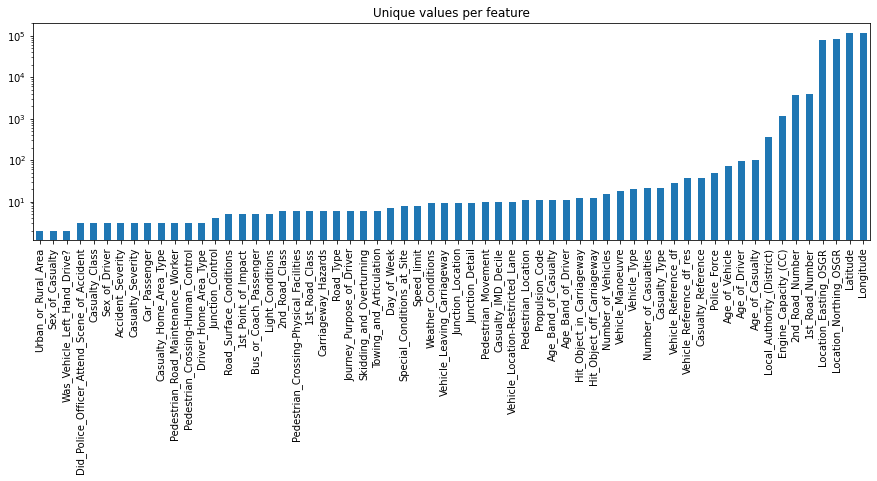

In [ ]:
## Structure of numerical features:

# For each numerical feature compute number of unique entries
unique_values = df_X.select_dtypes(include='number').nunique().sort_values()

#Plot information with y-axis in log-scale
unique_values.plot.bar(logy=True,figsize=(15, 4), title="Unique values per feature")

In [ ]:
# 2. Quality Investigation:

## 2.1 Duplicates investigation:
# Check number of duplicates while ignoring the index feature
n_duplicates = df_X.drop(labels=['Accident_Index'],axis=1).duplicated().sum()
n_duplicates

22

In [ ]:
#  Extract column names of all features, except 'Accident_Index'
columns_to_consider = df_X.drop(labels=['Accident_Index'],axis=1).columns

# Drop duplicates based on 'columns_to_consider'
df_X = df_X.drop_duplicates(subset = columns_to_consider)
df_X.shape

(363221, 67)

Text(0, 0.5, 'Sample Number')

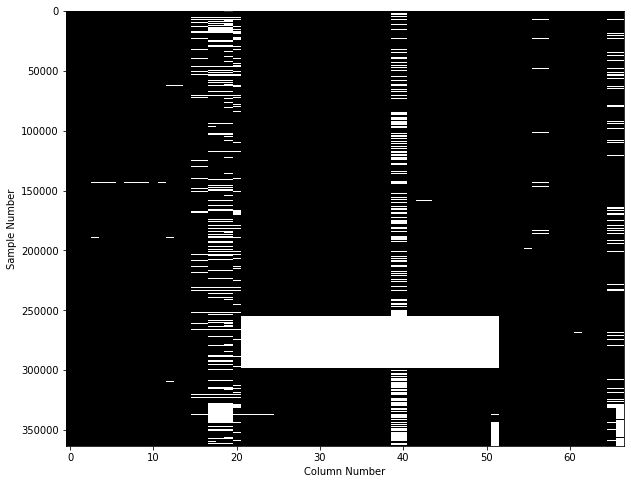

In [ ]:
## 2.2 Missing values Investigation

import matplotlib.pyplot as plt

plt.figure(figsize=(10,8))
plt.imshow(df_X.isna(),aspect='auto',interpolation="nearest",cmap='gray')
plt.xlabel("Column Number")
plt.ylabel("Sample Number")

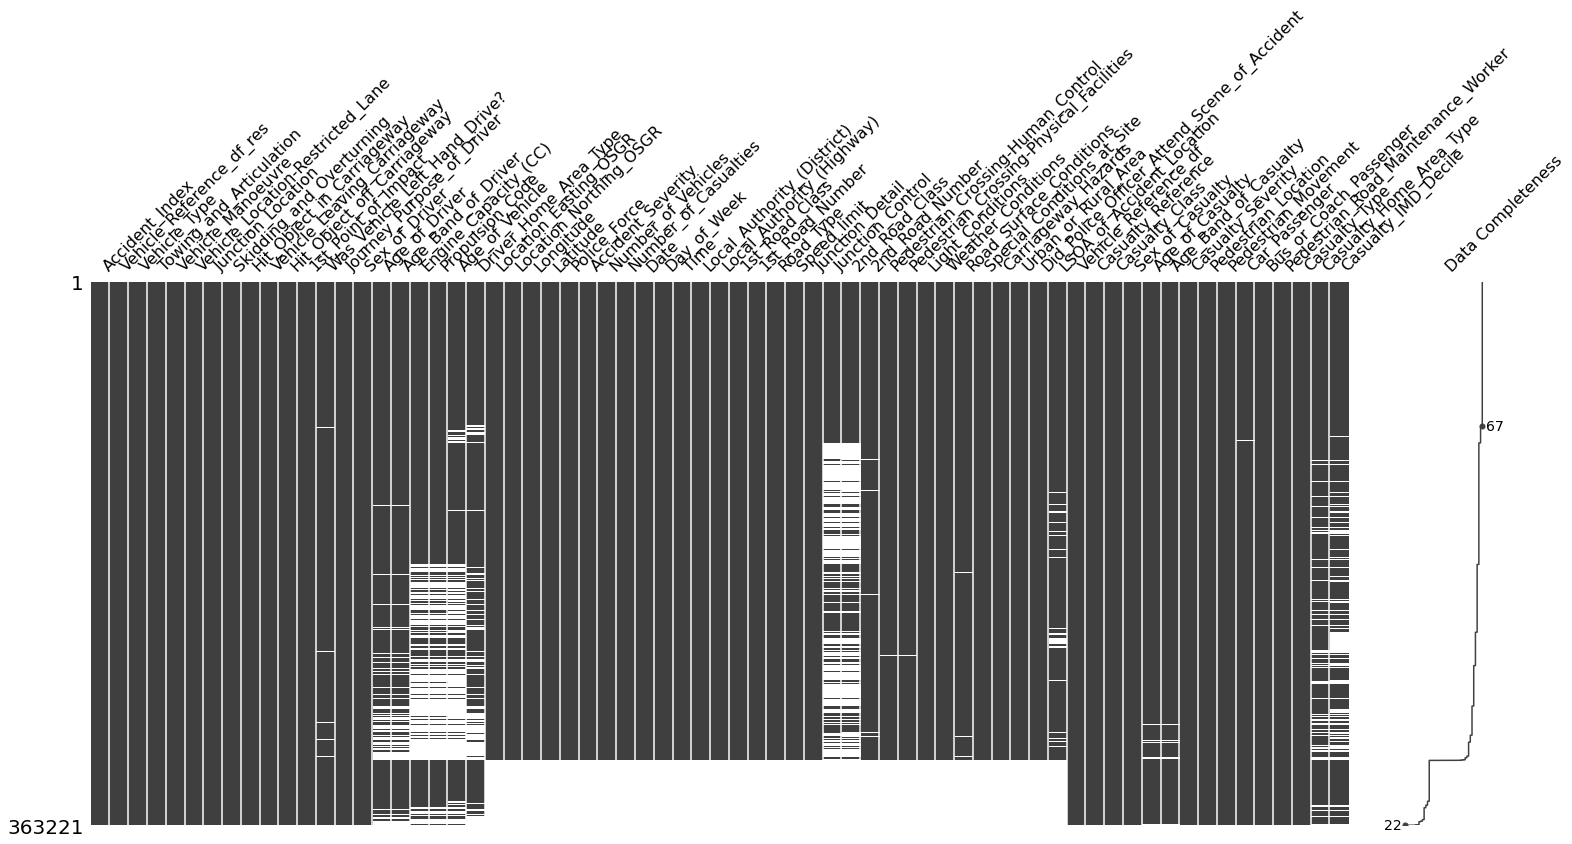

In [ ]:
import missingno as msno

msno.matrix(df_X, labels=True, sort="descending");

## On the right side of the plot is a sparkline that ranges from 0 on the left to the total number of columns in the dataframe on the right.
## A closeup can be seen above. When a row has a value in each column, the line will be at the maximum right position. 
## As missing values start to increase within that row the line will move towards the left.

In [ ]:
df_X = df_X.dropna(thresh = df_X.shape[1]*0.80,axis=0).reset_index(drop=True)
df_X.shape

(319790, 67)

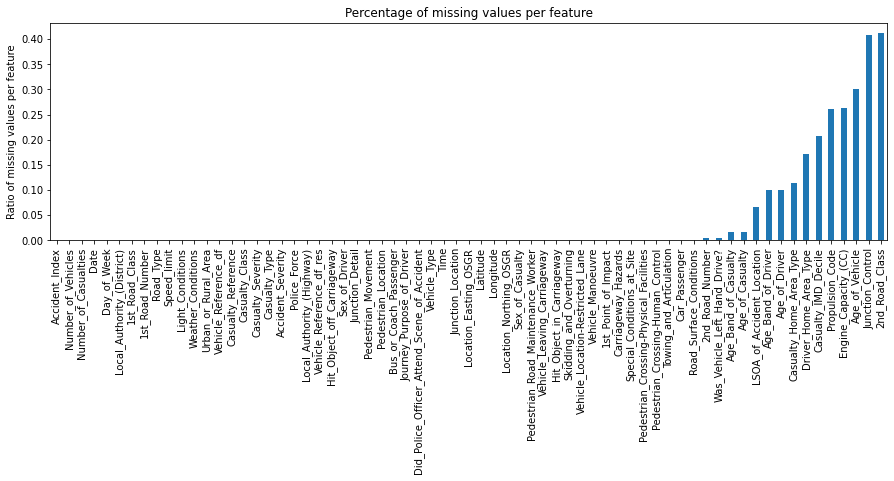

In [ ]:
df_X.isna().mean().sort_values().plot(kind="bar", figsize=(15, 4),
    title="Percentage of missing values per feature",
    ylabel="Ratio of missing values per feature")

## From this figure we can see that most features don't contain any missing values. 
## Nonetheless, features like 2nd_Road_Class, Junction_Control, Age_of_Vehicle still contain quite a lot of missing values.

In [ ]:
## Remove any feature with more than 15% of missing values

df_X = df_X.dropna(thresh = df_X.shape[0]*0.85,axis=1)
df_X.shape

(319790, 60)

In [ ]:
## Numerical Features

## Look for error cases/samples

df_X.plot()